In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv('sales_data_sample.csv',encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
QTR_ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
MONTH_ID,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
YEAR_ID,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [15]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [16]:
df.drop(columns =['ADDRESSLINE1','CUSTOMERNAME','ADDRESSLINE2','CITY','STATE','POSTALCODE','PHONE','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','ORDERNUMBER','STATUS','STATE','ORDERDATE'],axis =1, inplace=True)
df.head()


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [17]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'COUNTRY',
       'DEALSIZE'],
      dtype='object')

In [18]:
df.shape

(2823, 12)

In [19]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [22]:
df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [23]:
dealSize = pd.get_dummies(df['DEALSIZE'])
dealSize

,Large,Medium,Small
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
2818,0,0,1
2819,0,1,0
2820,0,1,0
2821,0,0,1


In [24]:
country = pd.get_dummies(df['COUNTRY'])
country

,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2819,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2821,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
productLine = pd.get_dummies(df['PRODUCTLINE'])
productLine

,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2818,0,0,0,1,0,0,0
2819,0,0,0,1,0,0,0
2820,0,0,0,1,0,0,0
2821,0,0,0,1,0,0,0


In [27]:
df = pd.concat([df,dealSize,country,productLine],axis=1)

In [28]:
df.drop(columns =['PRODUCTLINE','COUNTRY','DEALSIZE'],axis =1,inplace =True)

In [29]:
df.shape

(2823, 38)

In [31]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
QTR_ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
MONTH_ID,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
YEAR_ID,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0
PRODUCTCODE,2823.0,53.773291,31.585298,0.00,27.00,53.0,81.0,108.0
Large,2823.0,0.055615,0.229217,0.00,0.00,0.0,0.0,1.0


In [33]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Large,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,0,0,0,1,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,0,0,0,1,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,0,1,0,1,0,0,0,0,0


In [35]:
distortion = []
k =range(1,10)
for n in k:
    km = KMeans(n_clusters = n)
    km.fit(df)
    distortion.append(km.inertia_)

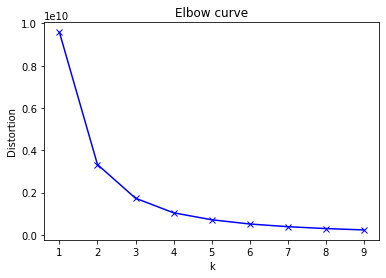

In [36]:
plt.plot(k,distortion,'-bx')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()

In [37]:
x_train = df.values
model = KMeans(n_clusters = 4,random_state=2)
model.fit(x_train)
pred = model.predict(x_train)

In [39]:
unique,count = np.unique(pred,return_counts = True) #counts occurrences of each cluster

In [40]:
print(unique)

[0 1 2 3]


In [41]:
print(count)

[1017 1047  199  560]


In [42]:
pred_df = pd.DataFrame(pred)

In [43]:
df = pd.concat([df,pred_df],axis=1)

In [44]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Large,...,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,0
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,1,0,1,0,0,0,0,0,0
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,0,0,1,0,0,0,0,0,0
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,0,0,1,0,0,0,0,0,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,1,0,0,0,0,0,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,1,0,0,0,0,0,3


In [46]:
df.shape

(2823, 39)

In [47]:
print(model.cluster_centers_)

[[ 3.51268437e+01  9.03024779e+01  6.59685349e+00  3.43589367e+03
   2.71484759e+00  7.07374631e+00  2.00379843e+03  1.03670600e+02
   5.60639135e+01  2.08166817e-17  7.68928220e-01  2.31071780e-01
   6.09636185e-02  1.96656834e-02  9.83284169e-03  2.65486726e-02
   2.45821042e-02  3.73647984e-02  1.07177974e-01  2.35988201e-02
   3.93313668e-03  4.52310718e-02  1.96656834e-02  2.35988201e-02
   9.83284169e-03  2.26155359e-02  1.21927237e-01  2.06489676e-02
   1.47492625e-02  5.50639135e-02  3.52999017e-01  3.20550639e-01
   1.20943953e-01  1.31760079e-01  1.14060964e-01  1.86823992e-02
   1.00294985e-01  1.93706981e-01]
 [ 2.98844317e+01  6.56257784e+01  6.62846227e+00  1.89010368e+03
   2.72492837e+00  7.13276027e+00  2.00381662e+03  7.35272206e+01
   6.33428844e+01  2.08166817e-17 -9.43689571e-16  1.00000000e+00
   7.25883477e-02  1.71919771e-02  1.43266476e-02  2.86532951e-02
   1.81470869e-02  2.86532951e-02  1.20343840e-01  2.19675263e-02
   6.68576886e-03  4.10697230e-02  1.7191

In [48]:
df2 = df.drop(columns = [0],axis =1)

In [49]:
cc = pd.DataFrame(data = model.cluster_centers_, columns = [df2.columns])
cc

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Large,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,35.126844,90.302478,6.596853,3435.893668,2.714848,7.073746,2003.798427,103.670600,56.063913,2.081668e-17,...,0.014749,0.055064,0.352999,0.320551,0.120944,0.131760,0.114061,0.018682,0.100295,0.193707
1,29.884432,65.625778,6.628462,1890.103677,2.724928,7.132760,2003.816619,73.527221,63.342884,2.081668e-17,...,0.004776,0.054441,0.348615,0.258835,0.121299,0.119389,0.089780,0.043935,0.088825,0.277937
2,46.371859,99.841859,5.527638,7983.625477,2.658291,6.899497,2003.919598,154.291457,28.050251,7.889447e-01,...,0.005025,0.025126,0.402010,0.582915,0.120603,0.060302,0.010050,0.005025,0.075377,0.145729
3,40.760714,99.556661,6.258929,5304.723161,2.730357,7.119643,2003.805357,127.142857,40.862500,1.387779e-17,...,0.017857,0.046429,0.357143,0.453571,0.101786,0.062500,0.039286,0.019643,0.162500,0.160714
